# TP4 - Analyse de données ouvertes de la ville de Montréal - Criminalité
Voici la source de nos donnees http://donnees.ville.montreal.qc.ca/dataset/actes-criminels

*Nous avons du separer les donnees en deux fichiers csv, car le fichier etait trop lourd, donc pycharm ne voulait pas le traiter.

## Introduction :
Avec la situation de pandémie actuelle, nous trouvions intéressant de comparer l’effet de la crise sur le taux de criminalité de la ville de Montréal. Nous avons choisi la ville de Montréal puisque c’est la ville avec les données les plus à jour que nous avions de disponibles. Notre analyse porte sur la quantité de crimes reporté à la SPVM. Afin d’évaluer le possible impacte du Covid-19 sur ceux-ci, nous observerons la répartition des crimes totaux sur le premier quadrimestre de 2019 (année de référence) et de 2020, en plus de calculer le Khi-deux pour en évaluer la relation.

On tente donc de démontrer que le confinement à un lien avec la diminution du nombre de crimes sur l'ile de Montréal en comparant avec les données à pareille date l'an dernier.


## Voici les étapes que nous avons fait afin de faire notre analyse :

In [1]:
# On commence ici par importer les extentions dont nous allons avoir besoin au cours de notre analyse.
import pandas
import matplotlib.pyplot as plt
from scipy import stats

Les données utilisées pour notre travail ont été récuppérées sur le site de la ville de Montréal : http://donnees.ville.montreal.qc.ca/dataset/actes-criminels

In [2]:
# Définition des fonctions
## La fonction imprimer_histogramme nous serviras à afficher l'histogramme selon les différents paramètres qui seront utiles.
def imprimer_histogramme(data_frame, titre, axe_des_X=None, axe_des_Y=None, ajustement_bas=None, ajustement_haut=None, ajustement_gauche=None, ajustement_droite=None):
    data_frame.plot(kind="bar", title=titre)
    plt.xlabel(axe_des_X)  # On nomme l'axe des X
    plt.ylabel(axe_des_Y)  # On nomme l'axe des Y
    plt.subplots_adjust(bottom=ajustement_bas, top=ajustement_haut, left=ajustement_gauche, right=ajustement_droite)  # On ajuste les dimensions du graphique afin de bien afficher les titres
    return plt.show()  # On fait afficher l'histogramme

## La fonction imprimer statistiques qui fait seulement un describe sur un dataframe. Ceci est plus pour l'esthétique qu'autre choses.
def imprimer_statistiques(data_frame):
    print(data_frame.describe())

In [3]:
# Avec pandas, on lis les donnees du csv de 2019 et 2020.
donnees_criminalite_2019 = pandas.read_csv("donnees_criminalite_csv_2019.csv", delimiter=";", parse_dates=["DATE"])
donnees_criminalite_2020 = pandas.read_csv("donnees_criminalite_csv_2020.csv", delimiter=";", parse_dates=["DATE"])

In [4]:
# Ensuite, on met les données dans un dataframe afin de pouvoir les utiliser dans nos analyses
donnees_criminalite_2019_data_frame = pandas.DataFrame(data=donnees_criminalite_2019)  # 2019
donnees_criminalite_2020_data_frame = pandas.DataFrame(data=donnees_criminalite_2020)  # 2020

In [5]:
# On utilise la fonction drop afin d'enlever les colones inutiles dans notre data frame
donnees_criminalite_2019_data_frame = pandas.DataFrame.drop(donnees_criminalite_2019_data_frame, columns= ["PDQ", "X", "Y", "LONGITUDE", "LATITUDE"])  # 2019
donnees_criminalite_2020_data_frame = pandas.DataFrame.drop(donnees_criminalite_2020_data_frame, columns= ["PDQ", "X", "Y", "LONGITUDE", "LATITUDE"])  # 2020

In [6]:
# Étant donné que notre analyses sera sur une base mensuelle, nous allons convertir le format date actuel en mois uniquement.
# NOTE : Il en va de soi que 1 = Janvier, 2 = Février, 3= Mars, 4= Avril, etc.
pandas.DataFrame(donnees_criminalite_2019_data_frame)['DATE'] = pandas.DataFrame(donnees_criminalite_2019_data_frame)['DATE'].dt.month  # 2019
pandas.DataFrame(donnees_criminalite_2020_data_frame)['DATE'] = pandas.DataFrame(donnees_criminalite_2020_data_frame)['DATE'].dt.month  # 2020

## ANALYSE - comparaison des données de criminalité avant et pendant la pandémie

Avec la situation de pandémie actuelle, nous trouvions intéressant de comparer l’effet de la crise sur le taux de criminalité de la ville de Montréal. Nous avons choisi la ville de Montréal puisque c’est la ville avec les données les plus à jour que nous avions de disponibles. Notre analyse porte sur la quantité de crimes reporté à la SPVM. Afin d’évaluer le possible impacte du Covid-19 sur ceux-ci, nous observerons la répartition des crimes totaux sur le premier quadrimestre de 2019 (année de référence) et de 2020, en plus de calculer le Khi-deux pour en évaluer la relation.

On tente donc de démontrer que le confinement à un lien avec la diminution du nombre de crimes sur l'ile de Montréal en comparant avec les données à pareille date l'an dernier.

In [7]:
# On groupe les données ensemble en utilisant le "groupby" et la fonction aggregate pour calculer le nombre de crimes par mois pour 2019.
crimes_mensuel_2019_data_frame = pandas.DataFrame(donnees_criminalite_2019_data_frame).groupby(['DATE']).agg(
    Nb_Infraction_par_mois_2019=('CATEGORIE', "count"))  # 2019

# Afficher seulement les 4 premiers mois de 2019 pour comparer avec les 4 premiers mois de 2020.
crimes_mensuel_2019_data_frame = pandas.DataFrame(crimes_mensuel_2019_data_frame).drop(crimes_mensuel_2019_data_frame.index[4:12])

# On groupe les données ensemble en utilisant le "groupby" et la fonction aggregate pour calculer le nombre de crimes par mois pour 2020.
crimes_mensuel_2020_data_frame = pandas.DataFrame(donnees_criminalite_2020_data_frame).groupby(['DATE']).agg(
    Nb_Infraction_par_mois_2020=('CATEGORIE', "count"))  # 2020

In [8]:
# Avec la fonction "merge", on regroupe le dataframe de 2019 avec celui de 2020 afin de mieux analyser les données.
crimes_mensuels_2019_2020_data_frame_merged = pandas.merge(left=crimes_mensuel_2019_data_frame, right=crimes_mensuel_2020_data_frame, on='DATE')

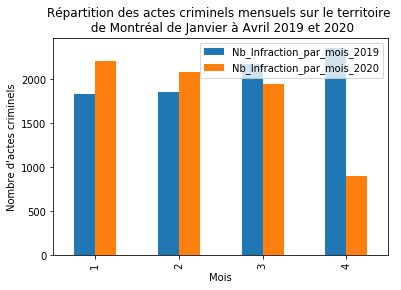

In [9]:
# Avec le package matplotlib.pyplot, nous allons représenter graphiquement les données afin de mieux les comparer.
## ANNÉE 2019-2020 (Janvier à Avril) - Nous utilisons les données que nous avons regroupé plus tôt. Nous appelons la fonction définie au début du code afin d'afficher un histogramme.
imprimer_histogramme(data_frame=crimes_mensuels_2019_2020_data_frame_merged, titre="Répartition des actes criminels mensuels sur le territoire \n de Montréal de Janvier à Avril 2019 et 2020",
                     axe_des_X="Mois", axe_des_Y="Nombre d'actes criminels")

In [10]:
# Nous imprimons les statistiques générales que nous allons pouvoir analyser.
imprimer_statistiques(crimes_mensuels_2019_2020_data_frame_merged) # Appel la fonction définie plus haut

       Nb_Infraction_par_mois_2019  Nb_Infraction_par_mois_2020
count                     4.000000                     4.000000
mean                   2056.500000                  1788.250000
std                     252.866895                   599.875751
min                    1839.000000                   902.000000
25%                    1850.250000                  1691.000000
50%                    2016.500000                  2021.500000
75%                    2222.750000                  2118.750000
max                    2354.000000                  2208.000000


In [11]:
# Nous imprimons le tableau de données agrégé
print(crimes_mensuels_2019_2020_data_frame_merged)

      Nb_Infraction_par_mois_2019  Nb_Infraction_par_mois_2020
DATE                                                          
1                            1839                         2208
2                            1854                         2089
3                            2179                         1954
4                            2354                          902


In [12]:
# On crée une liste avec les données mensuelles du premier quadrimestre de chaque année
liste_crimes_mensuel_2019 = crimes_mensuel_2019_data_frame['Nb_Infraction_par_mois_2019'].to_list()
liste_crimes_mensuel_2020 = crimes_mensuel_2020_data_frame['Nb_Infraction_par_mois_2020'].to_list()

In [13]:
# On calcule et on affiche la variation de janvier à avril pour 2019
variation_janvier_a_avril_2019 = round((liste_crimes_mensuel_2019[3] - liste_crimes_mensuel_2019[0]) / liste_crimes_mensuel_2019[0], 4)
print(variation_janvier_a_avril_2019)

0.28


In [14]:
# On calcule et on affiche la variation de janvier à avril pour 2020
variation_janvier_a_avril_2020 = round((liste_crimes_mensuel_2020[3] - liste_crimes_mensuel_2020[0]) / liste_crimes_mensuel_2020[0], 4)
print(variation_janvier_a_avril_2020)

-0.5915


In [15]:
# On calcule et on affiche la variation de mars à avril pour 2020
variation_mars_avril_2020 = round((liste_crimes_mensuel_2020[3] - liste_crimes_mensuel_2020[2]) / liste_crimes_mensuel_2020[2], 4)
print(variation_mars_avril_2020)

-0.5384


In [16]:
# On calcul et on imprime le khi2 et la valeur p ; hypothèse - les crimes de 2019 se répartissent normalement d'année en année
print(stats.chisquare(liste_crimes_mensuel_2020, liste_crimes_mensuel_2019))

Power_divergenceResult(statistic=1022.687032865224, pvalue=2.155598792122454e-221)


## ANALYSE - comparaison des données de criminalité avant et pendant la pandémie

En 2019, le nombre d’actes criminels augmente de progressivement à chaque mois au cours des quatre premier mois de l’année. En 2020, c’est l’inverse qui se produit avec une diminution de 59,15% entre janvier et avril. Si l’on compare à l’augmentation de 28% qui a été mesuré pour les mêmes mois de 2019, on peut dire qu’il y a une différence significative entre les deux. Mieux encore, si l’on porte attention au mois d’avril, on peut voir que la diminution la plus importante se fait ressentir après que les mesures de confinement aient été mis en place avec une diminution de 53,84% entre le mois de mars et le mois d’avril. De plus, il est possible d’observer une divergence des moyennes entre le premier quadrimestre de 2019 et 2020, soit respectivement 2056 et 1788 crimes.. Cette variation est dû à la baisse des crimes enregistrés en avril 2020.

Pour évaluer l’impacte du Covid-19 sur les crimes, nous avons évalué les données extraites des 4 premiers mois de 2019 et de 2020. Notre hypothèse est que les crimes des 4 premiers mois de chaque années se répartissent normalement et pour ainsi dire, chaque début d’année se ressemble. Notre H0 = donc que le covid n’a aucune incidence sur les crimes reportés (si les données suivent 2019) et H1 = Le covid a une incidence sur les crimes reportés. En utilisant la fonction stats.chisquare on obtient le x2 de 1022.69, avec quoi nous obtenons une valeur-p de 2.1556e-221 et donc, puisqu’il y a moins de 0,01% de chance que les données se répartissent comme elle le font présentement, l’hypothèse H0 est rejetée. Le Covid-19 a donc une incidence sur les crimes dans la ville de Montréal.